<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G2
#### Team: T3
#### Members:
1. Bradley Goh
2. Denzyl Ng
3. Jared Yeo
4. Nagaraj Yohapriya
5. Zhang Zemin

#### Dataset: Credit

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 
The dataset contains data of individuals applying for a credit facility in a bank. Each row corresponds to a different applicant and contains attributes captured by bank during an application. The approval status of each application is also captured in each row.

**b.** State the size of the dataset

**Response.**
1000 rows x 23 columns

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**
ID - Identification number - Categorical
Checking_Account - Status of checking account - Categorical
Duration - Credit duration in months - Numerical
Payment_Status - Credit history - Categorical
Purpose - Purpose of credit - Categorical
Amount - Credit amount - Numerical
Savings_Account - Status of savings account - Categorical
Employment - Length of current employment - Categorical
Installment - Installment rate as percentage of disposable income - Numerical
Personal_Status - Marital status and sex - Categorical
Guarantors - Other debtors or guarantors - Categorical
Residence_Length - Number of years staying in current residence - Categorical
Assets - Asset ownership - Categorical
Age - Age in years - Numerical
Credit_Rating - Credit rating - Numerical
Existing_Credits - Other existing credit in place - Categorical
Housing_Type - Type of apartment - Categorical
Num_Credits - Number of existing credits - Numerical
Occupation - Occupation - Categorical
Dependents - Number of dependents - Numerical
Telephone - Has telephone - Categorical
Foreign_Worker - Foreign worker or not - Categorical
Approval - Loan approval status - Categorical

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [17]:
#**Response.** 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

credit = pd.read_csv("credit.csv")

#percentage of missing values for each column
missing = credit.apply(lambda x: x.isna().sum()/1000)
print(missing)

#Assume that they have no checking account when data is missing, therefore, data under checking account should be encoded with 4
#Assume that they have no dependents when data is missing, therefore, data under dependents should be set to 0

#fill in empty rows for checking account
credit["Checking_Account"].fillna(4, inplace=True)

#fill in empty rows for dependents
credit["Dependents"].fillna(0, inplace=True)

ID                  0.000
Checking_Account    0.058
Duration            0.000
Payment_Status      0.000
Purpose             0.000
Amount              0.000
Savings_Account     0.000
Employment          0.000
Installment         0.000
Personal_Status     0.000
Guarantors          0.000
Residence_Length    0.000
Assets              0.000
Age                 0.000
Credit_Rating       0.000
Existing_Credits    0.000
Housing_Type        0.000
Num_Credits         0.000
Occupation          0.000
Dependents          0.050
Telephone           0.000
Foreign_Worker      0.000
Approval            0.000
dtype: float64


/var/folders/g5/zpmfr17s5rd1k9ny_cs103km0000gn/T/ipykernel_13168/579277158.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["Checking_Account"].fillna(4, inplace=True)
/var/folders/g5/zpmfr17s5rd1k9ny_cs103km0000gn/T/ipykernel_13168/579277158.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

In [ ]:
#**Response.** 

#check if ID are all unique values
id = credit["ID"].unique()
print(len(id))

# Find invalid values (less than 1 or greater than 4) for Residence_Length
invalid_values = credit[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4)]

credit = credit[credit["Foreign_Worker"].isin([1, 2])]

# Print results
if not invalid_values.empty:
    print("Invalid Residence_Length values found:")
    print(invalid_values)
    
    # Calculate the mode of Residence_Length (excluding invalid values)
    valid_residence = credit[(credit["Residence_Length"] >= 1) & (credit["Residence_Length"] <= 4)]["Residence_Length"]
    residence_mode = valid_residence.mode()[0]  # mode() returns a Series, so we get the first value

    # Replace invalid values with the mode
    credit.loc[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4), "Residence_Length"] = residence_mode

1000
Invalid Residence_Length values found:
      ID  Checking_Account  Duration  Payment_Status  Purpose  Amount  \
41    42               4.0        12               4        0     682   
47    48               4.0        12               4        6    2748   
86    87               4.0        10               2        0    1546   
99   100               4.0        36               2        9    5742   
323  324               1.0        36               2       10   15857   
329  330               4.0        30               2        3    2333   
425  426               4.0         8               4        0     713   
496  497               4.0        12               2        6    3321   
578  579               2.0         9               2        3    1082   
760  761               2.0        24               2        1    4113   
836  837               4.0         6               2        3    1595   
952  953               4.0        18               4        3    6070   

     S

**c.** For categorical variables, perform the necessary encoding.

**Response.** 
Data is already encoded, no encoding performed.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

In [14]:
#**Response.** 

# Summary of Checking_Account
print(f"Checking_Account - Mode: \n{credit.Checking_Account.mode()}\n")

# Summary of Duration
print(f"Duration - Mean: {credit.Duration.mode()}")
print(f"Duration - Median: {credit.Duration.median()}")
print(f"Duration - Variance: {credit.Duration.var()}")

# Summary of Payment_Status
print(f"Payment_Status - Mode: \n{credit.Payment_Status.mode()}\n")

# Summary of Purpose
print(f"Purpose - Mode: \n{credit.Purpose.mode()}\n")

# Summary of Amount
print(f"Amount - Mean: {credit.Amount.mean()}")
print(f"Amount - Median: {credit.Amount.median()}")
print(f"Amount - Variance: {credit.Amount.var()}")

# Summary of Savings_Account
print(f"Savings_Account - Mode: \n{credit.Savings_Account.mode()}\n")

# Summary of Employment
print(f"Employment - Mode: \n{credit.Employment.mode()}\n")

# Summary of Installment
print(f"Installment - Mean: {credit.Installment.mean()}")
print(f"Installment - Median: {credit.Installment.median()}")
print(f"Installment - Variance: {credit.Installment.var()}")

#Summary of Personal Status
print(f"Personal_Status - Mode: \n{credit.Personal_Status.mode()}\n")

#Summary of Guarantors
print(f"Guarantors - Mode: \n{credit.Guarantors.mode()}\n")

#Summary of Residence_Length
print(f"Residence_Length - Mode: \n{credit.Residence_Length.mode()}\n")

#Summary of Assets
print(f"Assets - Mode: \n{credit.Assets.mode()}\n")

# Summary of Num_Credits
print(f"Num_Credits - Mean: {credit.Num_Credits.mean()}")
print(f"Num_Credits - Median: {credit.Num_Credits.median()}")
print(f"Num_Credits - Variance: {credit.Num_Credits.var()}")

# Mode for Occupation
print(f"Purpose - Mode: \n{credit.Occupation.mode()}\n")

# Summary of Dependents
print(f"Dependents - Mean: {credit.Dependents.mean()}")
print(f"Dependents - Median: {credit.Dependents.median()}")
print(f"Dependents - Variance: {credit.Dependents.var()}")

# Mode for Foreign_Worker
print(f"Purpose - Mode: \n{credit.Foreign_Worker.mode()}\n")


Checking_Account - Mode: 
0    4.0
Name: Checking_Account, dtype: float64

Duration - Mean: 0    24
Name: Duration, dtype: int64
Duration - Median: 18.0
Duration - Variance: 142.60000400400398
Payment_Status - Mode: 
0    2
Name: Payment_Status, dtype: int64

Purpose - Mode: 
0    3
Name: Purpose, dtype: int64

Amount - Mean: 3275.058
Amount - Median: 2332.0
Amount - Variance: 7858476.899535535
Savings_Account - Mode: 
0    1
Name: Savings_Account, dtype: int64

Employment - Mode: 
0    3
Name: Employment, dtype: int64

Installment - Mean: 2.973
Installment - Median: 3.0
Installment - Variance: 1.2515225225225226
Personal_Status - Mode: 
0    3
Name: Personal_Status, dtype: int64

Guarantors - Mode: 
0    1
Name: Guarantors, dtype: int64

Residence_Length - Mode: 
0    4
Name: Residence_Length, dtype: int64

Assets - Mode: 
0    3
Name: Assets, dtype: int64

Num_Credits - Mean: 1.407
Num_Credits - Median: 1.0
Num_Credits - Variance: 0.3336846846846848
Purpose - Mode: 
0    3
Name: Occu

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

The majority of applicants are skilled employees/officials, while unskilled residents and management/self-employed make up smaller groups, with unemployed/unskilled non-residents being the smallest.
The number of applicants with 1 existing credit is significantly higher than those with 2, 3, or 4 dependents, with applicants having 4 existing credits representing a minority.
The majority of applicants (80.1%) have 1 dependent, while 14.9% have 2 dependents, and only 5.0% have no dependents.


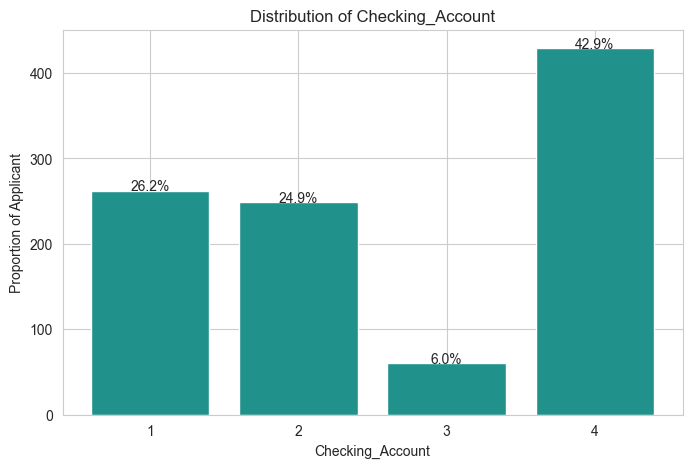

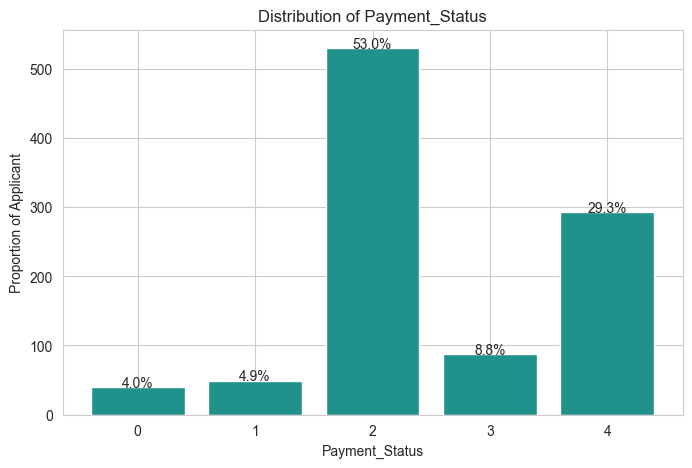

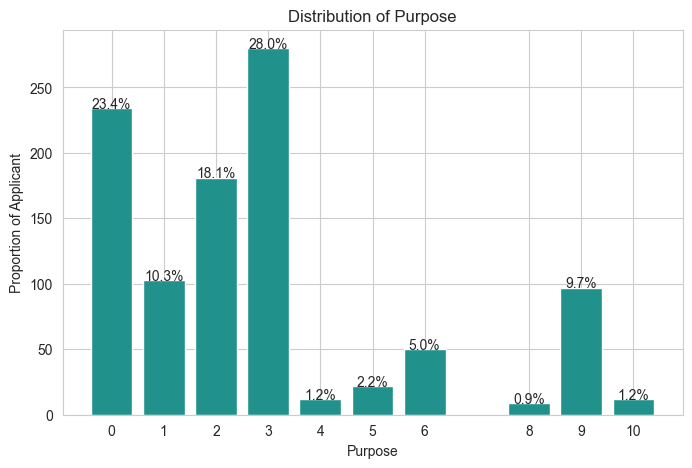

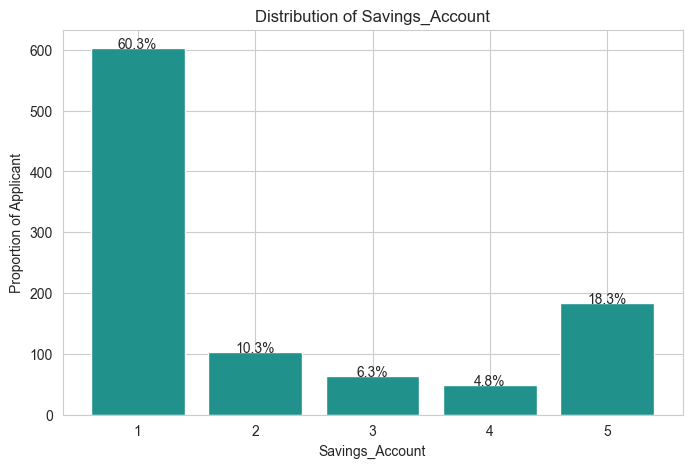

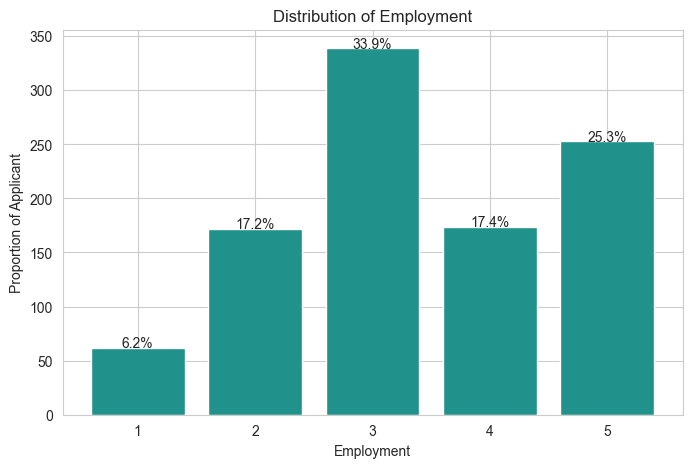

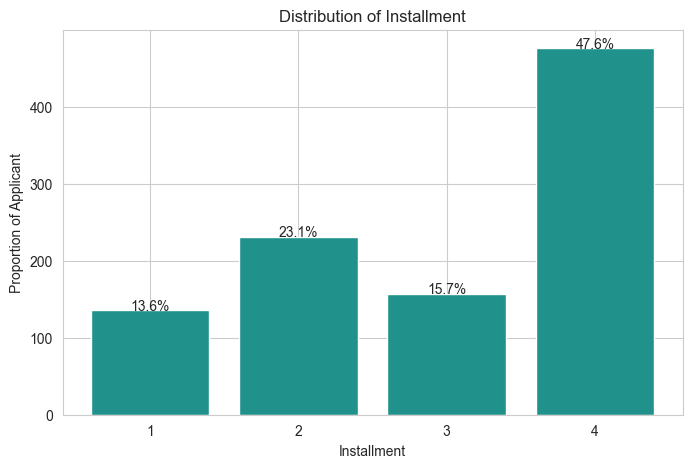

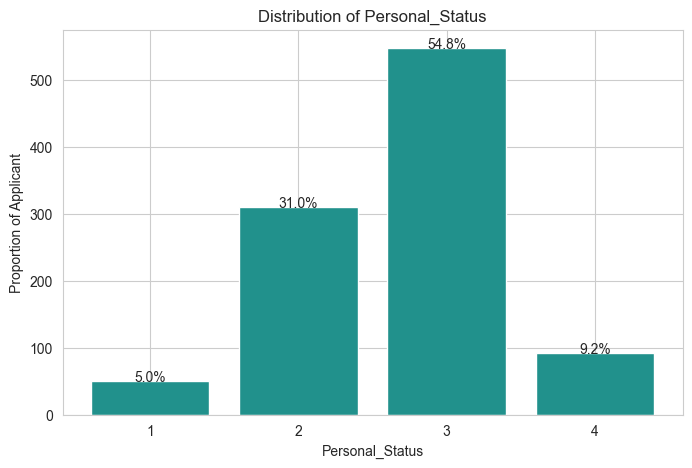

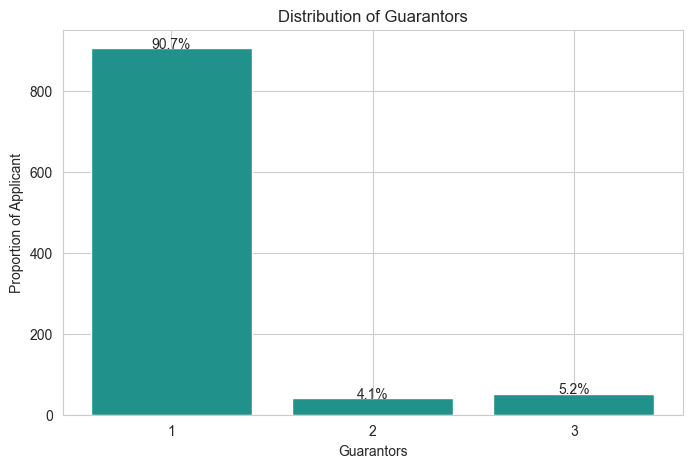

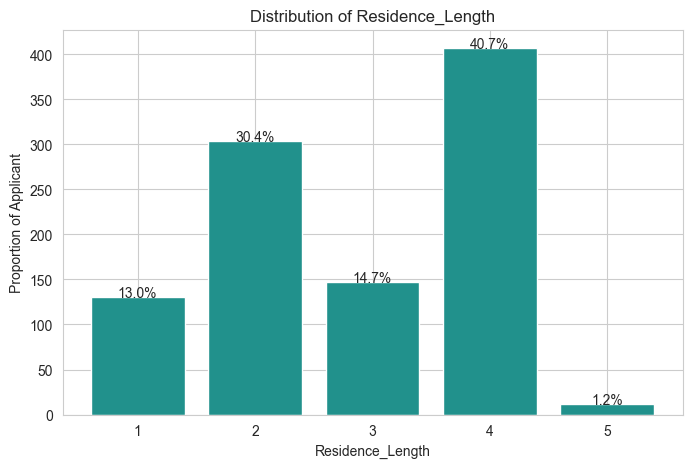

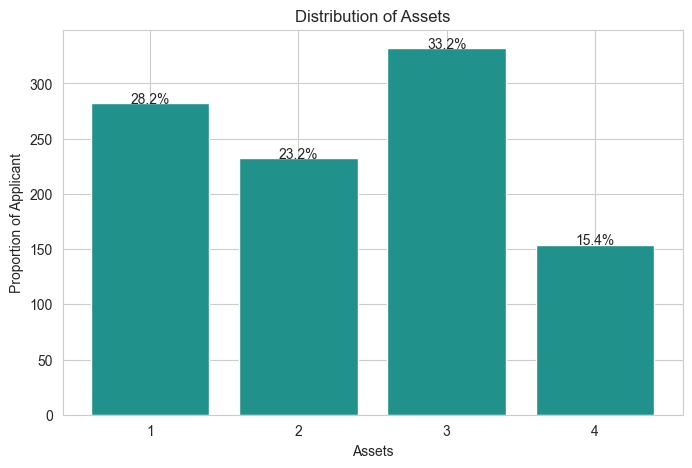

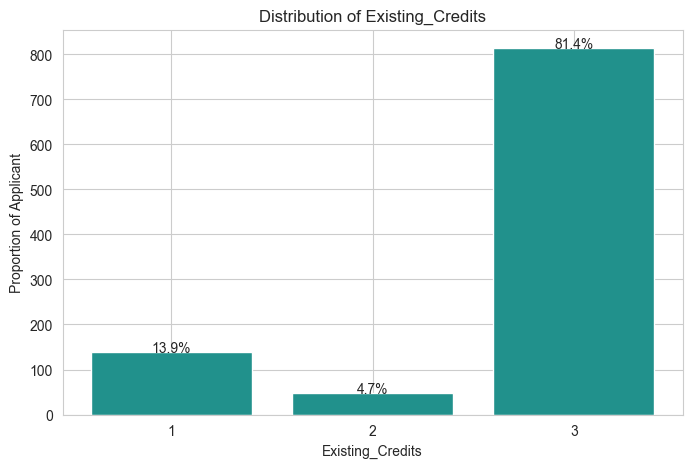

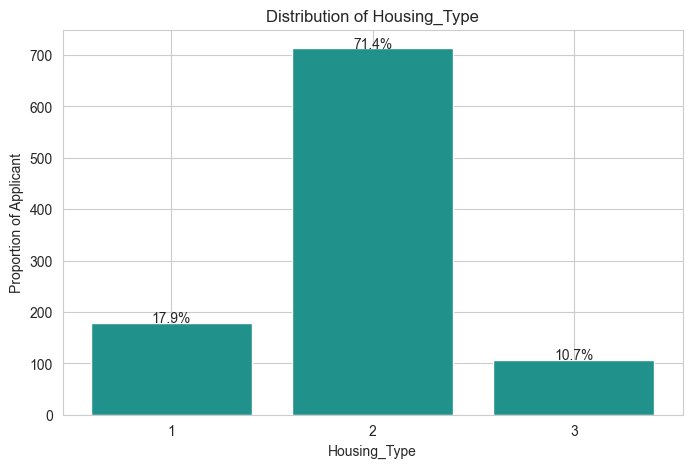

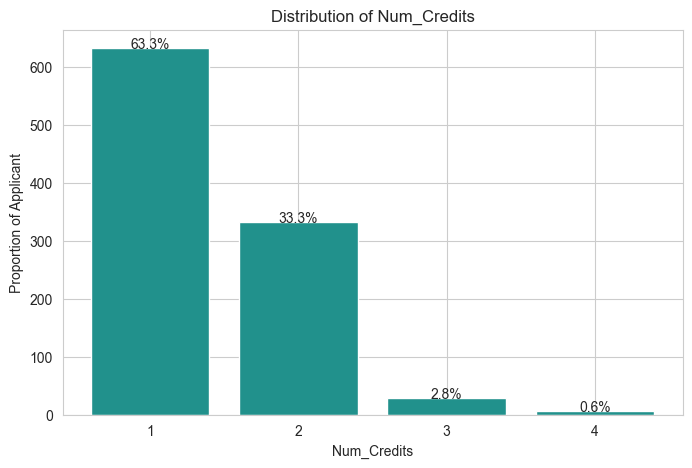

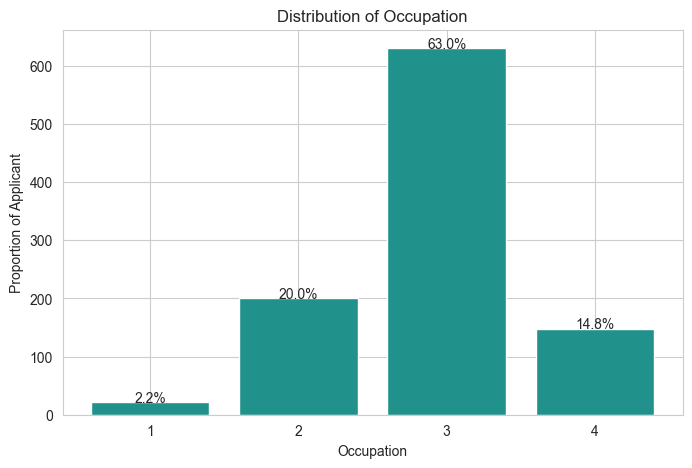

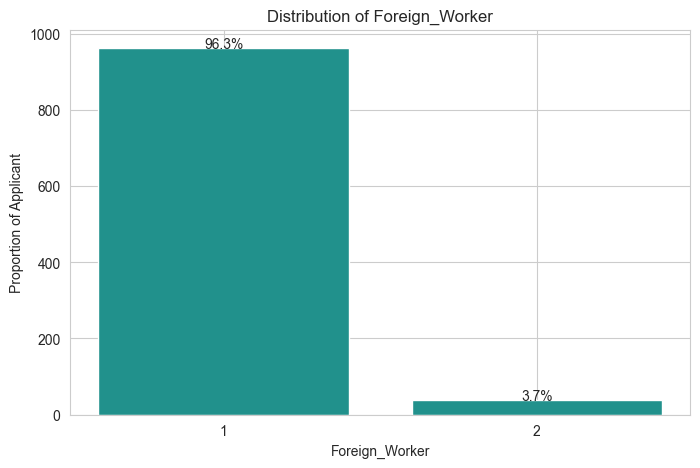

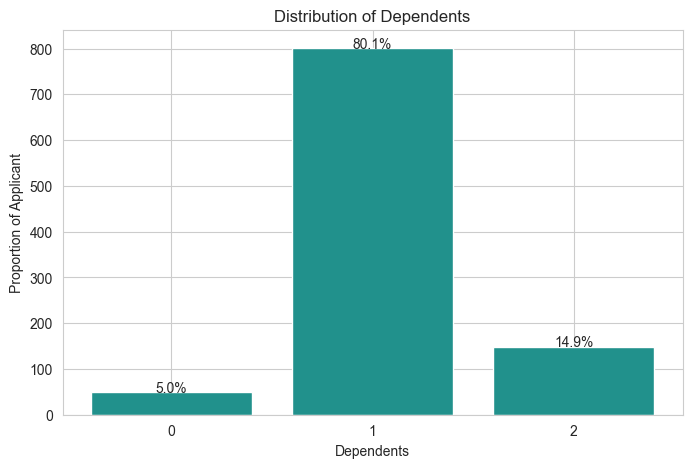

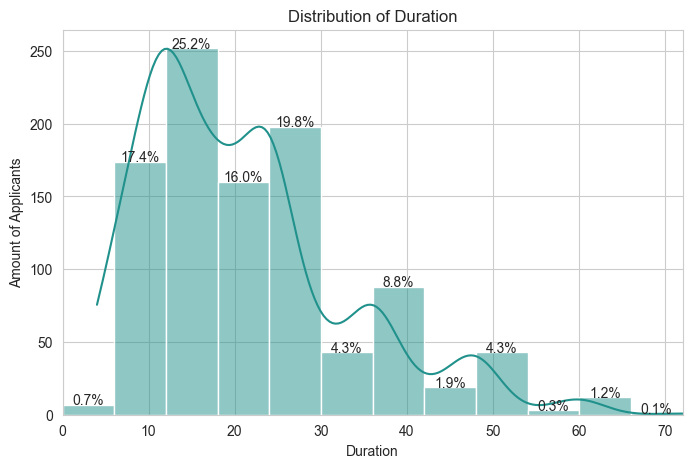

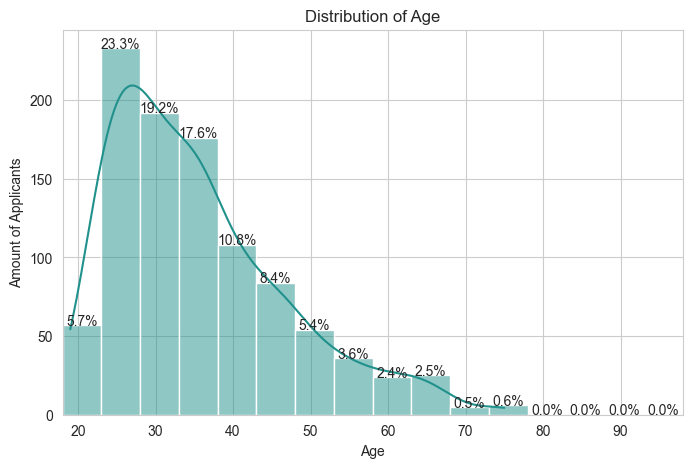

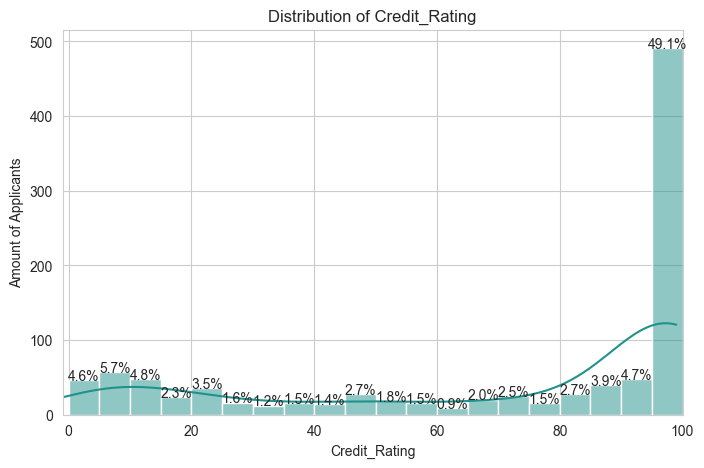

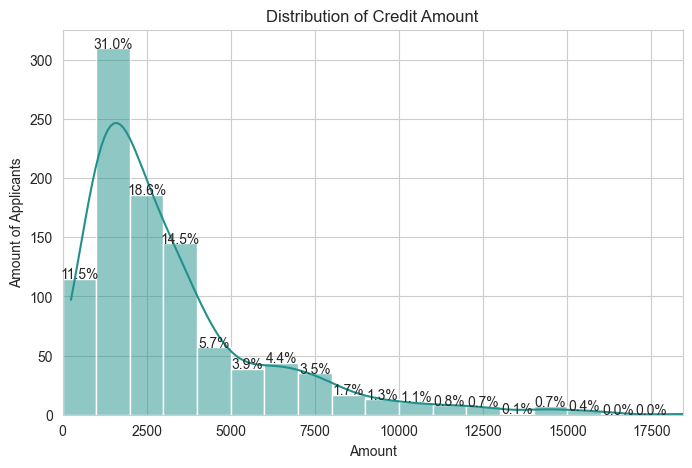

In [112]:
#**Response.** 
sns.set_style("whitegrid")
print("The majority of applicants are skilled employees/officials, while unskilled residents and management/self-employed make up smaller groups, with unemployed/unskilled non-residents being the smallest.")
print("The number of applicants with 1 existing credit is significantly higher than those with 2, 3, or 4 dependents, with applicants having 4 existing credits representing a minority.")
print("The majority of applicants (80.1%) have 1 dependent, while 14.9% have 2 dependents, and only 5.0% have no dependents.")

# get graph for each non-binned/categorical data
categorical_data = ["Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Installment", "Personal_Status", "Guarantors", "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Num_Credits", "Occupation", "Foreign_Worker", "Dependents"]
for category in categorical_data:
    data = credit.groupby(category).size()
    plt.figure(figsize=(8, 5))
    xs = data.index
    ys = data
    ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
    title = "Distribution of " + category
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel("Proportion of Applicant")
    plt.xticks(xs)
    for p in ax:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
                f'{height/1000:.1%}', ha="center", fontsize=10)
    plt.show()

# Get graph for each binned/numerical data
binned_numerical = ["Duration", "Age", "Credit_Rating"]
for num in binned_numerical:
    if num == "Duration":
        bin = [x for x in range(0, 75, 6)]
    if num == "Age":
        bin = [x for x in range(18, 100, 5)]
    if num == "Credit_Rating":
        bin = [x for x in range(0, 105, 5)]
    plt.figure(figsize=(8,5))
    ax = sns.histplot(credit[num], bins= bin, kde=True, color=plt.cm.viridis(0.5))
    title = "Distribution of " + num 
    plt.title(title)
    plt.xlabel(num)
    plt.ylabel("Amount of Applicants")
    plt.margins(x=0)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / 1000) * 100  # Calculate percentage
        # Add the text label at the top of each bar
        plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
                f'{percentage:.1f}%', ha="center", fontsize=10)
    plt.show()

#Distribution of credit amount
plt.figure(figsize=(8,5))
ax = sns.histplot(credit["Amount"], bins=[x for x in range(0, 19000, 1000)], kde=True, color=plt.cm.viridis(0.5))
plt.title("Distribution of Credit Amount")
plt.xlabel("Amount")
plt.ylabel("Amount of Applicants")
plt.margins(x=0)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / 1000) * 100  # Calculate percentage
    # Add the text label at the top of each bar
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{percentage:.1f}%', ha="center", fontsize=10)
plt.show()

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

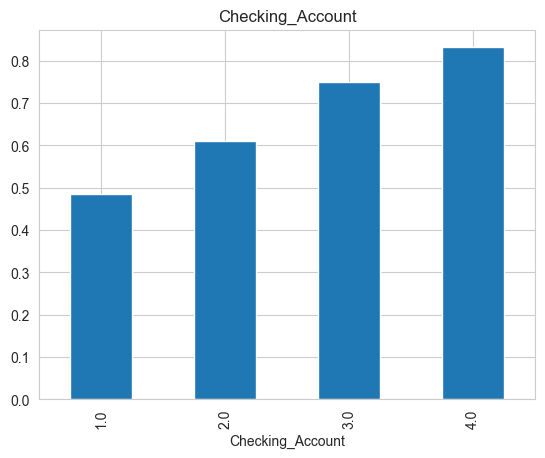

/var/folders/g5/zpmfr17s5rd1k9ny_cs103km0000gn/T/ipykernel_13168/2915561879.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_approval = credit.set_index(pd.cut(credit["Duration"], bins=[x for x in range(3, 73, 3)]))["Approval"].groupby("Duration").mean()


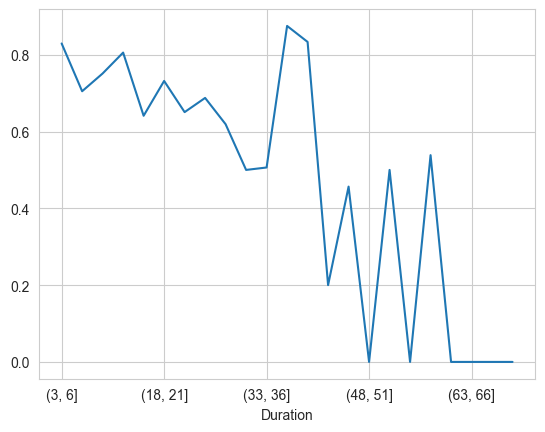

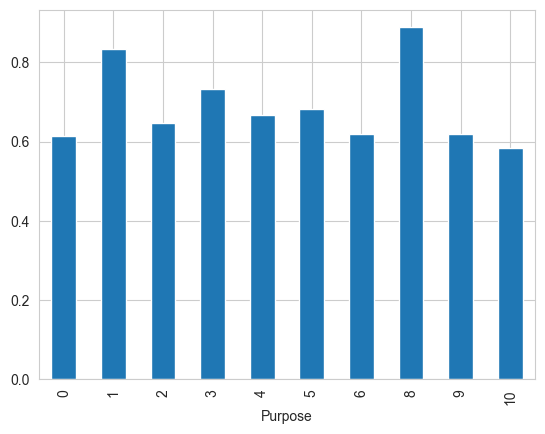

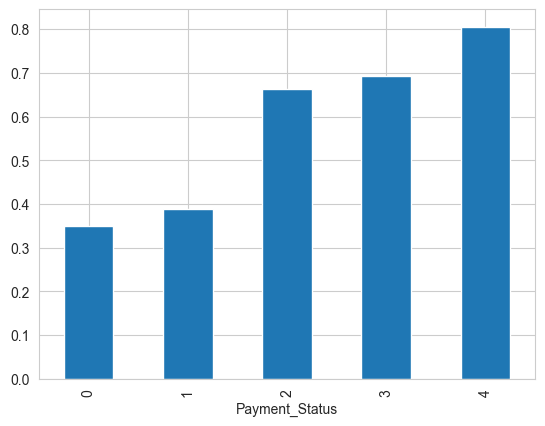

In [31]:
#**Response.** 
#bivariate analysis of checking account and approval
checking_account_approval = credit.set_index("Checking_Account")["Approval"].groupby("Checking_Account").mean()
checking_account_approval.plot(kind="bar", title="Checking_Account")
plt.show()

#bivariate analysis of duration and approval
duration_approval = credit.set_index(pd.cut(credit["Duration"], bins=[x for x in range(3, 73, 3)]))["Approval"].groupby("Duration").mean()
duration_approval.fillna(0,inplace=True)
duration_approval.plot(kind="line")
plt.show()

#bivariate analysis of purpose and approval
purpose_approval = credit.set_index("Purpose")["Approval"].groupby("Purpose").mean()
purpose_approval.plot(kind="bar")
plt.show()

#bivariate analysis of payment status and approval
payment_status_approval = credit.set_index("Payment_Status")["Approval"].groupby("Payment_Status").mean()
payment_status_approval.plot(kind="bar")
plt.show()